In [42]:
#import library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\New folder\mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [44]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [45]:
#• looks like our dataset has no NaNs! • Overview, Original_Language and Poster-Url
# wouldn't be so useful during analysis • Release_Date column needs to be casted into
# date time and to extract only the year value

In [46]:
# exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [47]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [48]:
#• genres are saperated by commas followed by whitespaces.

In [49]:
# check for duplicated rows
df.duplicated().sum()

0

In [50]:
#• our dataset has no duplicated rows either.

In [51]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#there is only 3 numaric columns that is Popularity	Vote_Count	Vote_Average

• Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
• there is noticable outliers in Popularity column
• Vote_Average bettter be categorised for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be hand

# Data Cleaning


Casting Release_Date column and extracing year values


df.head()


In [52]:
# Extract the year from the 'Release_Date' column and store it as an integer
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Confirm the changes
print(df['Release_Date'].head())
print(df['Release_Date'].dtype)


0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32
int32


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [54]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#Dropping Overview, Original_Languege and Poster-Url

In [55]:
cols = ['Overview','Original_Language', 'Poster_Url']

In [56]:
df.drop(cols, axis=1, inplace = True)

In [57]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,6.6,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821,6.8,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206,6.3,Thriller
8,2022,Fistful of Vengeance,1594.013,114,5.3,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726,7.2,Science Fiction


categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.

In [58]:
# Define the categorize function
def categorize_col(df, col, labels):
    # Setting the edges to cut the column accordingly
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.5),
        df[col].quantile(0.75),
        df[col].max(),
    ]
    
    # Ensuring edges are unique to avoid errors with pd.cut
    edges = list(sorted(set(edges)))
# Apply pd.cut to categorize the column
    df[col + '_categorized'] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop', include_lowest=True)
    
    return df

In [59]:
# Apply the categorize function
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)

In [60]:
# Count occurrences in each category
category_counts = df['Vote_Average_categorized'].value_counts()

# Display the results
print(category_counts)

Vote_Average_categorized
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64


In [61]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_categorized
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [62]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date                0
Title                       0
Popularity                  0
Vote_Count                  0
Vote_Average                0
Genre                       0
Vote_Average_categorized    0
dtype: int64

In [63]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_categorized
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie

In [64]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_categorized
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [65]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Release_Date              25793 non-null  int32   
 1   Title                     25793 non-null  object  
 2   Popularity                25793 non-null  float64 
 3   Vote_Count                25793 non-null  int64   
 4   Vote_Average              25793 non-null  float64 
 5   Genre                     25793 non-null  category
 6   Vote_Average_categorized  25793 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 958.2+ KB


In [67]:
df.nunique()


Release_Date                 102
Title                       9513
Popularity                  8160
Vote_Count                  3266
Vote_Average                  74
Genre                         19
Vote_Average_categorized       4
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
rows to dig into during our analysis

#Data Visualization

here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.

In [68]:
# setting up seaborn configurations
sns.set_style('whitegrid')


Q1: What is the most frequent genre in
the dataset?

In [69]:
# showing stats. on genre column
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

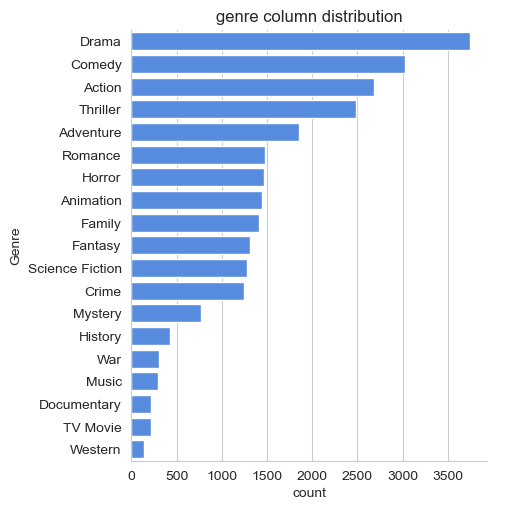

In [70]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
 order = df['Genre'].value_counts().index,
 color = '#4287f5')
plt.title('genre column distribution')
plt.show()

we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres.

##Q2: What genres has highest votes ?


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12244\2277521750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


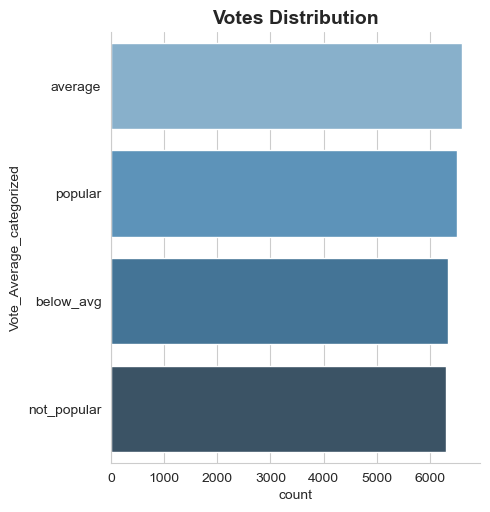

In [75]:
# Visualizing the Vote_Average column
sns.catplot(
    y='Vote_Average_categorized',data=df, kind='count',
    order=df['Vote_Average_categorized'].value_counts().index,  # Ensure ordering matches the count
    palette='Blues_d')
plt.title('Votes Distribution', fontsize=14, fontweight='bold')
plt.show()


Q3: What movie got the highest popularity ? what's its
genre ?

In [76]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_categorized
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


Q4: What movie got the lowest popularity? what's
its genre?

In [77]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_categorized
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25790,1984,Threads,13.354,186,7.8,War,popular
25791,1984,Threads,13.354,186,7.8,Drama,popular
25792,1984,Threads,13.354,186,7.8,Science Fiction,popular


Q5: Which year has the most filmmed movies?


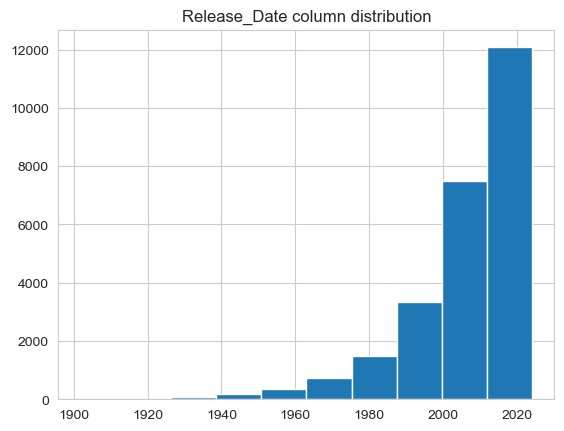

In [78]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

Conclusion

Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.

Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.

Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

Q3: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.

Q4: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.